<a href="https://colab.research.google.com/github/renqiu-chen/INFO6105-Notebooks/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 6.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
url='https://raw.githubusercontent.com/renqiu-chen/INFO6105-Notebooks/main/high_diamond_ranked_10min.csv'

In [3]:
# Read the dataset into a pandas dataframe
dataset = pd.read_csv(url)

dataset=dataset[['blueWins', 'blueAssists', 'blueTowersDestroyed', 'blueAvgLevel', 'blueTotalJungleMinionsKilled', 'redAssists','redTowersDestroyed','redAvgLevel','redTotalJungleMinionsKilled']]

# Split the dataset into X (features) and y (target)
y = dataset.iloc[:, 0]
X = dataset.iloc[:, 1:]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Abstract

*   blueWins: Target value, the result of the match
*   blueAssits: The sum of the assist number of blue side
*   blueTowerDestroyed: The sum of the tower destroy number of blue side
*   blueAvgLevel: The avg number of the blue side level
*   blueTotalJungleMinionsKilled: The sum of the jungle minions killed number of blue side
*   redAssits: The sum of the assist number of red side
*   redTowerDestroyed: The sum of the tower destroy number of red side
*   redAvgLevel: The avg number of the red side level
*   redTotalJungleMinionsKilled: The sum of the jungle minions killed number of red side







# Linear Regression

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the train and test MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the results
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)

Train MAE: 0.29119334158137444
Test MAE: 0.291497975708502


# Random Forest

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a random forest classifier to the training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the train and test MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the results
print('Train MAE:', train_mae)
print('Test MAE:', test_mae)

Train MAE: 0.001012292118582791
Test MAE: 0.3188259109311741


In [7]:
# calculate feature importances
importances = model.feature_importances_

# print feature importances
for i, imp in enumerate(importances):
    print(f"Feature {i}: {imp:.4f}")

Feature 0: 0.1663
Feature 1: 0.0118
Feature 2: 0.1250
Feature 3: 0.2034
Feature 4: 0.1650
Feature 5: 0.0106
Feature 6: 0.1207
Feature 7: 0.1971


# Neural Network

In [8]:
import tensorflow as tf
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
num_features = X.shape[1]

# Define the neural network architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(num_features,)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Print the train MAE, test MAE, and each epoch loss
train_preds = model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_preds)
test_preds = model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_preds)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

for i, loss in enumerate(history.history['loss']):
    print(f"Epoch {i+1} loss: {loss:.4f}")

Epoch 1/50
217/217 [==============================] - 4s 10ms/step - loss: 0.6298 - val_loss: 0.6119
Epoch 2/50
217/217 [==============================] - 2s 8ms/step - loss: 0.6140 - val_loss: 0.6558
Epoch 3/50
217/217 [==============================] - 1s 5ms/step - loss: 0.6016 - val_loss: 0.6081
Epoch 4/50
217/217 [==============================] - 1s 5ms/step - loss: 0.6081 - val_loss: 0.6096
Epoch 5/50
217/217 [==============================] - 1s 5ms/step - loss: 0.6058 - val_loss: 0.6179
Epoch 6/50
217/217 [==============================] - 1s 5ms/step - loss: 0.6099 - val_loss: 0.6276
Epoch 7/50
217/217 [==============================] - 1s 5ms/step - loss: 0.5918 - val_loss: 0.6032
Epoch 8/50
217/217 [==============================] - 1s 6ms/step - loss: 0.6030 - val_loss: 0.6040
Epoch 9/50
217/217 [==============================] - 1s 6ms/step - loss: 0.5943 - val_loss: 0.6425
Epoch 10/50
217/217 [==============================] - 2s 8ms/step - loss: 0.6035 - val_loss: 0.603

# Partial Dependence Plots

In [9]:
reg = LogisticRegression()
pipeline = Pipeline([
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

Exact explainer: 2965it [00:31, 77.22it/s]                           


In [10]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

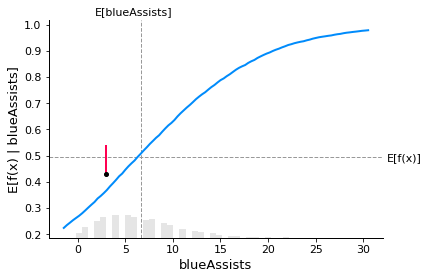

In [11]:
partial_dependence_plot('blueAssists', 0)

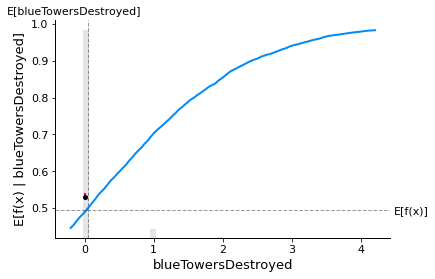

In [12]:
partial_dependence_plot('blueTowersDestroyed', 0)

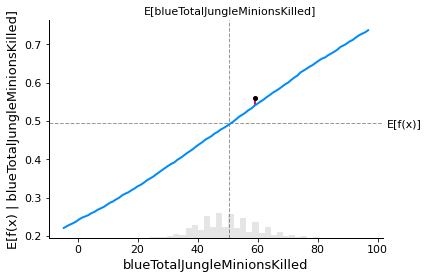

In [13]:
partial_dependence_plot('blueTotalJungleMinionsKilled', 0)

# Shap Plots

In [14]:
shap.initjs()

In [15]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

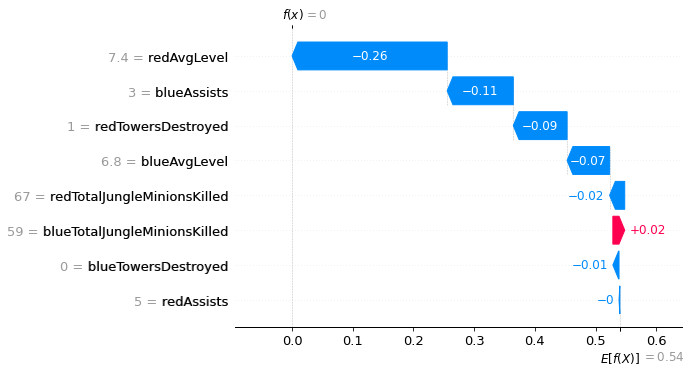

In [16]:
sample_feature_importance(0, 'waterfall')

In [17]:
sample_feature_importance(0, 'condensed')

# Feature Importance for model

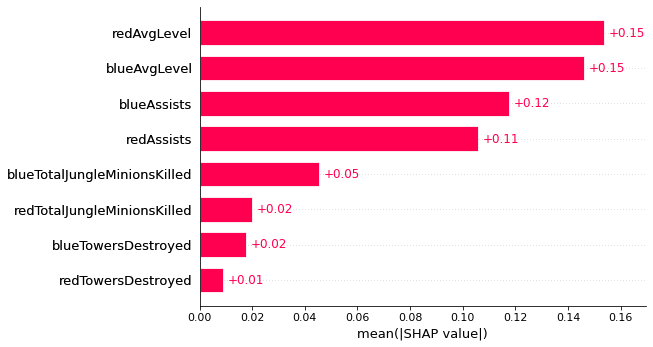

In [18]:
shap.plots.bar(shap_values)

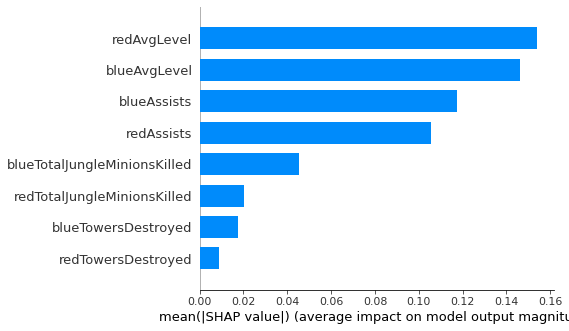

In [19]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

In [34]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False) #revert
preprocessed_X_train = X_train

num_epochs = 50
learning_rate = 0.01
hidden_size = 32
batch_size = 50
input_dim = preprocessed_X_train.shape[1]
batch_no = preprocessed_X_train.shape[0] // batch_size
model = nn.Sequential(
    nn.Linear(input_dim, hidden_size),
    nn.Linear(hidden_size, 1)
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        x_batch = Variable(torch.FloatTensor(preprocessed_X_train.values[start:end]))
        y_batch = Variable(torch.FloatTensor(y_train.values[start:end]))
        optimizer.zero_grad()
        y_preds = model(x_batch)
        loss = criterion(y_preds, torch.unsqueeze(y_batch,dim=1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 10 == 0: 
        print("Epoch {}, Loss: {}".format(epoch, running_loss))
        
preprocessed_X_test = X_test
y_pred = model(torch.from_numpy(preprocessed_X_test.values).float()).flatten().detach().numpy()
test_mae = mean_absolute_error(y_test, y_pred)
preprocessed_X_train = X_train
y_pred = model(torch.from_numpy(preprocessed_X_train.values).float()).flatten().detach().numpy()
train_mae = mean_absolute_error(y_train, y_pred)
print(f"\ntrain MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

Epoch 0, Loss: 640.828818410635
Epoch 10, Loss: 38.42015294730663
Epoch 20, Loss: 36.53749068081379
Epoch 30, Loss: 36.33718974888325
Epoch 40, Loss: 36.61371214687824

train MAE = 0.407, test MAE = 0.408 


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


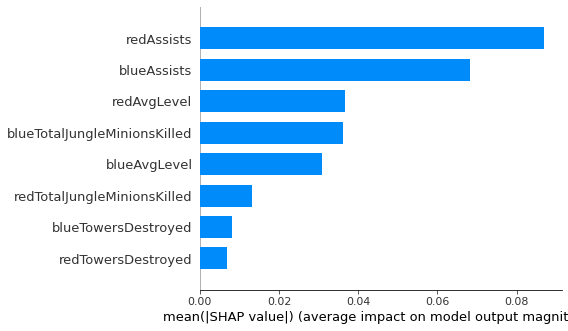

In [35]:
explainer = shap.DeepExplainer(model, torch.from_numpy(preprocessed_X_train.values).float())
shap_values = explainer.shap_values(torch.from_numpy(preprocessed_X_test.values).float())
shap.summary_plot(shap_values, X_test, plot_type='bar')

# License

LICENSE
MIT License

Copyright (c) 2022 Sanika Patne

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Reference

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Dataset- https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

Notebook- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb